#             "Haberman's Survival Data Set"
    
  

The dataset contains cases from a study that was conducted between 
1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

# Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

# Data Preparation

In [234]:
#importing data from the CSV
import pandas as pd
haberman=pd.read_csv("haberman.csv")
print("Sample Data : \n \n",haberman.head())

Sample Data : 
 
    age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


# Basic info about the data

In [247]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


**Observations:**
1. There are 306 rows and 4 columns.
2. Each column is of type integer 
3. No null values observed.

# (Q) What are the column names in our dataset?

In [248]:
print ("Column names\n",list(haberman.columns))

Column names
 ['age', 'year', 'nodes', 'status']


# (Q) How many patients lived 5 years or longer(status=1) and how many lived less than 5 years(status=2) 

In [28]:
haberman["status"].value_counts()


1    225
2     81
Name: status, dtype: int64

**Observation:**
1. Patients who survived 5 years or more are significantly larger 
than people who lived less than 5 years.

# Basic statistics about the data set:

In [325]:
#Basic stats
haberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observations:**
1. Persons treated for cancer are between the age [30,83] 
thus persons less than 30 years of age are less prone to cancer.
2. 75% of patients has less than 5 nodes.
3. 75% of patients are above the age of 44 years.

# Bi-variate Analysis :

# Scatter Plot

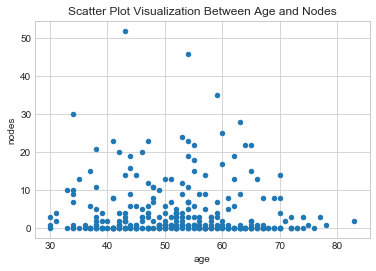

In [303]:
#1.1
import matplotlib.pyplot as plt
haberman.plot(kind='scatter', x='age', y='nodes') ;
plt.title("Scatter Plot Visualization Between Age and Nodes")
plt.show()

**Observation:**
1. We have some outliers in the age and nodes features.

# Scatter Plot with Colour Code

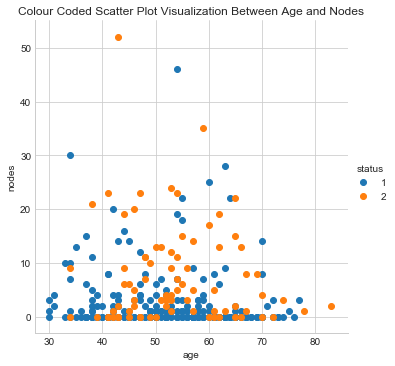

In [304]:
#1.2
import seaborn as sns
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();

plt.title("Colour Coded Scatter Plot Visualization Between Age and Nodes")
plt.show();


**Observation:**
1. People less than 33 years of age has more probability to live more than 5 years

# Pair-Plot

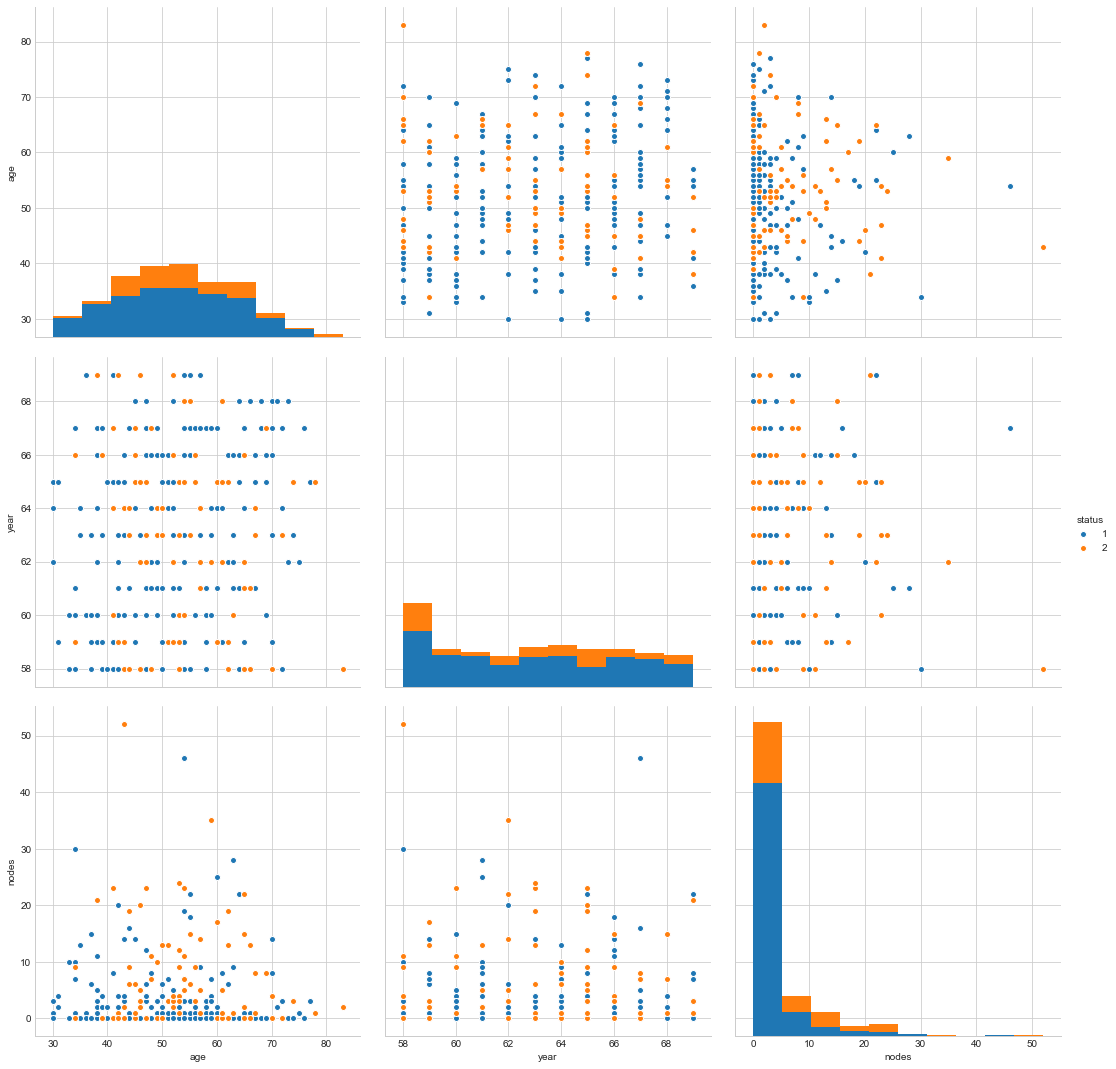

In [305]:
# 2.1

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status",size=5,vars=["age","year","nodes"]);

plt.show()

**Observations:**
1. From the 2-D Scatter plot between nodes and age we can assume that the persons above 70 years of age has 5 nodes or less.


# Histograms

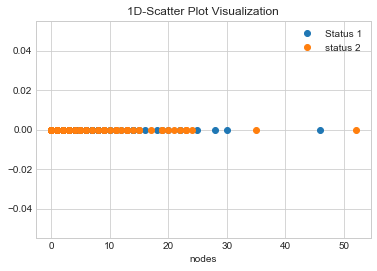

In [306]:
#3.1
import numpy as np
status_1 = haberman.loc[haberman["status"] == 1];
status_2 = haberman.loc[haberman["status"] == 2];

plt.plot(status_1["nodes"], np.zeros_like(status_1['nodes']),'o',label='Status 1')
plt.plot(status_2["nodes"], np.zeros_like(status_2['nodes']),'o',label='status 2')
plt.xlabel("nodes")
plt.legend()
plt.title("1D-Scatter Plot Visualization")


plt.show()

**Observation**:
1. Number of nodes for the different Statuses are overlaping thus we cannot conclusively differentiate 
   between different statuses based on number of nodes nodes.

# Probability Density Funtion

# PDF for Nodes

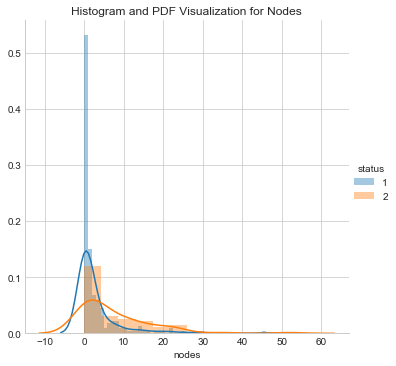

In [307]:
#4.1
import warnings
warnings.filterwarnings('ignore')
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Histogram and PDF Visualization for Nodes")
plt.show();

**Observations:**
1. Both the PDFs follows the Gaussain distribution in this case.
2. Thus we can say 98% of people have number of nodes between -2sigma and +2sigma
3. Both of our curves are overlapping which tells us that there is no clear segrigation of status based on number of nodes.
4. Both the curves are skewed towards the right which signifies heavier tails and presence of extreme outliers.


# PDF for Age

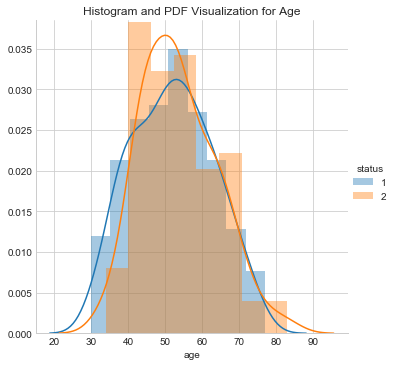

In [308]:
#4.2
warnings.filterwarnings('ignore')
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram and PDF Visualization for Age")
plt.show();


**Observations:**
1. Both the PDFs follow the Gaussian distribution.
2. Thus we can say 98% of people have number of nodes between -2sigma and +2sigma
3. Mean age for Status=2 is 50 years.
4. As both the PDFs are overlapping we can't conclusively say that people of a certain age group has higher chances of survival.

# PDF for Year

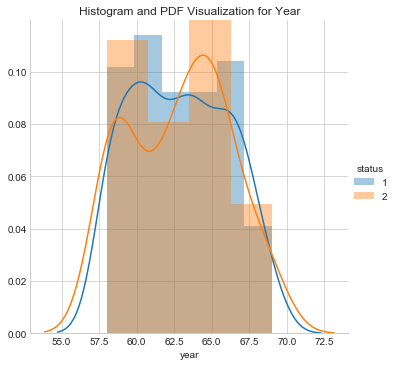

In [309]:
#4.3
warnings.filterwarnings('ignore')
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Histogram and PDF Visualization for Year")
plt.show();

**Observations:**
1. PDF of "Status 2" shows the bimodal distribution, thus it has two local maxima.
2. A flat peak for PDF of Status 1 signifies the constant number of patients with status 1 survival over a range of years.
3. As both the PDFs are overlapping we can't distinguish between the status 1 and 2 clearly.

# Cumulative Distribution Function

# CDF for Nodes When Status is 1

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


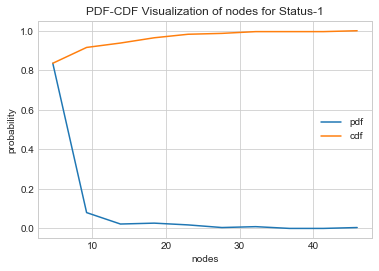

In [310]:
#5.1
counts, bin_edges = np.histogram(status_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')

plt.legend()
plt.xlabel("nodes")
plt.ylabel("probability")
plt.title("PDF-CDF Visualization of nodes for Status-1")
plt.show();

# CDF for Nodes When Status is 2

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


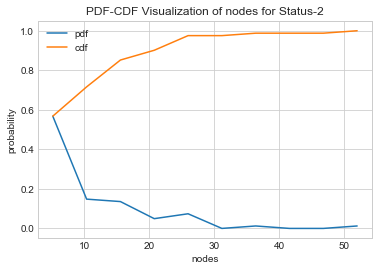

In [311]:
#5.2
counts, bin_edges = np.histogram(status_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')

plt.legend()
plt.xlabel("nodes")
plt.ylabel("probability")
plt.title("PDF-CDF Visualization of nodes for Status-2")
plt.show();

# Combined CDF of Nodes for Status 1 and 2

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


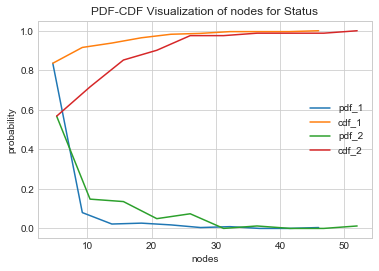

In [312]:
#5.3
counts, bin_edges = np.histogram(status_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_1');
plt.plot(bin_edges[1:], cdf,label='cdf_1')

#Status_2
counts, bin_edges = np.histogram(status_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_2');
plt.plot(bin_edges[1:], cdf,label='cdf_2')


plt.legend()
plt.title("PDF-CDF Visualization of nodes for Status")
plt.xlabel("nodes")
plt.ylabel("probability")
plt.show();

**Observations:**
1. From the CDF of Status 1 we can conclude that 90% of people with
   survival status as 1 has less than 20 nodes.
2.  From the CDF of Status 2 we can conclude that 90% of people with
    survival status as 2 has less than 30 nodes
    

# CDF for Age When Status is 1

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


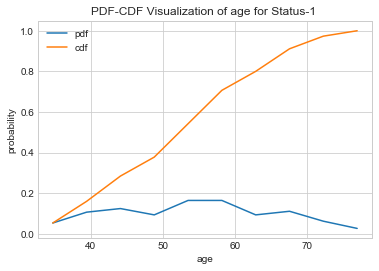

In [313]:
#5.4
counts, bin_edges = np.histogram(status_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')

plt.legend()
plt.xlabel("age")
plt.ylabel("probability")
plt.title("PDF-CDF Visualization of age for Status-1 ")
plt.show();

# CDF for Age When Status is 2

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


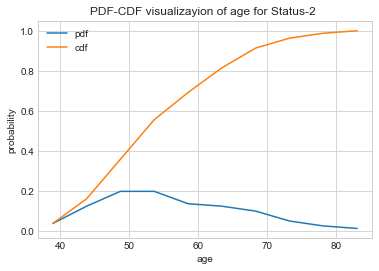

In [314]:
#5.5
counts, bin_edges = np.histogram(status_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')

plt.legend()
plt.xlabel("age")
plt.ylabel("probability")
plt.title("PDF-CDF visualizayion of age for Status-2 ")
plt.show();

# Combined CDF of Age for Status 1 and 2

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


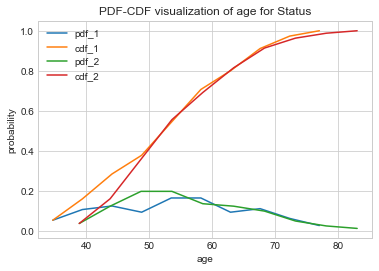

In [315]:
#5.6
counts, bin_edges = np.histogram(status_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_1');
plt.plot(bin_edges[1:], cdf,label='cdf_1')

#Status_2
counts, bin_edges = np.histogram(status_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_2');
plt.plot(bin_edges[1:], cdf,label='cdf_2')


plt.legend()
plt.title("PDF-CDF visualization of age for Status")
plt.xlabel("age")
plt.ylabel("probability")
plt.show();

**Observations:**
1. Probability of a person living 5 years or more, is more for people whose age is less than 49 years.
2. After the age of 49 years the probability of a person living mre than 5 years and less than 5 years is approximately same.

# CDF for Year When Status is 1

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


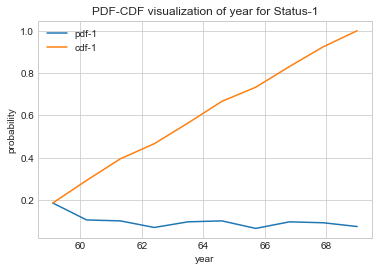

In [316]:
#5.7
counts,bin_edges=np.histogram(status_1['year'],bins=10,density=True)
pdf=(counts/(sum(counts)))
cdf=np.cumsum(pdf)
print(pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf,label='pdf-1')
plt.plot(bin_edges[1:],cdf,label='cdf-1')
plt.xlabel('year')
plt.ylabel('probability')
plt.title('PDF-CDF visualization of year for Status-1')
plt.legend()
plt.show()

# CDF for Year When Status is 2

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


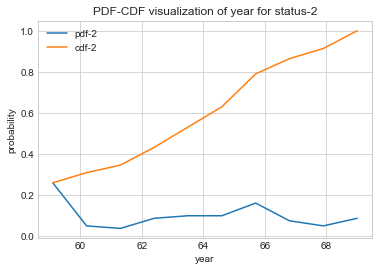

In [317]:
#5.8
counts,bin_edges=np.histogram(status_2['year'],bins=10,density=True)
pdf=(counts/(sum(counts)))
cdf=np.cumsum(pdf)
print(pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf,label='pdf-2')
plt.plot(bin_edges[1:],cdf,label='cdf-2')
plt.xlabel('year')
plt.ylabel('probability')
plt.title('PDF-CDF visualization of year for status-2')
plt.legend()
plt.show()

# Combined CDF of Year for Status 1 and 2

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


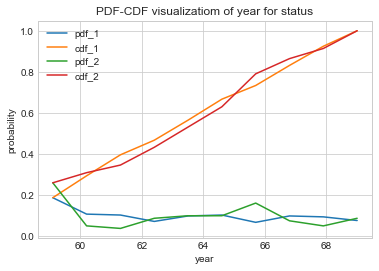

In [318]:
#5.9
counts, bin_edges = np.histogram(status_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_1');
plt.plot(bin_edges[1:], cdf,label='cdf_1')

#Status_2
counts, bin_edges = np.histogram(status_2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf_2');
plt.plot(bin_edges[1:], cdf,label='cdf_2')


plt.legend()
plt.title("PDF-CDF visualizatiom of year for status")
plt.xlabel("year")
plt.ylabel("probability")
plt.show();

**Observations:**
1. Approx 70% of people where opertaed before 1965.

# Mean and Std-dev

In [218]:
#Mean, Variance, Std-deviation,  
print("Means:")
print("Mean of nodes for Status-1 ",np.mean(status_1["nodes"]))
print("Mean of nodes for Status-2 ",np.mean(status_2["nodes"]))
print("Mean of age for Status-1 ",np.mean(status_1["age"]))
print("Mean of age for Status-2 ",np.mean(status_2["age"]))
print("Mean of year for Status-1 ",np.mean(status_1["year"]))
print("Mean of year for Status-2 ",np.mean(status_2["year"]))


print("\nStd-dev:");
print("Std-dev of nodes for Status-1 ",np.std(status_1["nodes"]))
print("Std-dev of nodes for Status-2 ",np.std(status_2["nodes"]))
print("Std-dev of age for Status-1 ",np.std(status_1["age"]))
print("Std-dev of age for Status-2 ",np.std(status_2["age"]))
print("Std-dev of year for Status-1 ",np.std(status_1["year"]))
print("Std-dev of year for Status-2 ",np.std(status_2["year"]))



Means:
Mean of nodes for Status-1  2.7911111111111113
Mean of nodes for Status-2  7.45679012345679
Mean of age for Status-1  52.01777777777778
Mean of age for Status-2  53.67901234567901
Mean of year for Status-1  62.86222222222222
Mean of year for Status-2  62.82716049382716

Std-dev:
Std-dev of nodes for Status-1  5.857258449412131
Std-dev of nodes for Status-2  9.128776076761632
Std-dev of age for Status-1  10.98765547510051
Std-dev of age for Status-2  10.10418219303131
Std-dev of year for Status-1  3.2157452144021956
Std-dev of year for Status-2  3.3214236255207883


# Median, Percentile, Quantile, IQR, MAD

In [217]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print("Median of nodes for Status-1 ",np.median(status_1["nodes"]))
print("Median of nodes for Status-2 ",np.median(status_2["nodes"]))



print("\nQuantiles:")
print("IQR of nodes for Status-1 ",np.percentile(status_1["nodes"],np.arange(0, 100, 25)))
print("IQR of nodes for Status-2 ",np.percentile(status_2["nodes"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print("90th Percentile of nodes for Status-1 ",np.percentile(status_1["nodes"],90))
print("90th Percentile of nodes for Status-2 ",np.percentile(status_2["nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("MAD of nodes for Status-1 ",robust.mad(status_1["nodes"]))
print("MAD of nodes for Status-2 ",robust.mad(status_2["nodes"]))




Medians:
Median of nodes for Status-1  0.0
Median of nodes for Status-2  4.0

Quantiles:
IQR of nodes for Status-1  [0. 0. 0. 3.]
IQR of nodes for Status-2  [ 0.  1.  4. 11.]

90th Percentiles:
90th Percentile of nodes for Status-1  8.0
90th Percentile of nodes for Status-2  20.0

Median Absolute Deviation
MAD of nodes for Status-1  0.0
MAD of nodes for Status-2  5.930408874022408


In [220]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print("Median of age for Status-1 ",np.median(status_1["age"]))
print("Median of age for Status-2 ",np.median(status_2["age"]))



print("\nQuantiles:")
print("IQR of age for Status-1 ",np.percentile(status_1["age"],np.arange(0, 100, 25)))
print("IQR of age for Status-2 ",np.percentile(status_2["age"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print("90th Percentile of age for Status-1 ",np.percentile(status_1["age"],90))
print("90th Percentile of age for Status-2 ",np.percentile(status_2["age"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("MAD of age for Status-1 ",robust.mad(status_1["age"]))
print("MAD of age for Status-2 ",robust.mad(status_2["age"]))




Medians:
Median of age for Status-1  52.0
Median of age for Status-2  53.0

Quantiles:
IQR of age for Status-1  [30. 43. 52. 60.]
IQR of age for Status-2  [34. 46. 53. 61.]

90th Percentiles:
90th Percentile of age for Status-1  67.0
90th Percentile of age for Status-2  67.0

Median Absolute Deviation
MAD of age for Status-1  13.343419966550417
MAD of age for Status-2  11.860817748044816


In [221]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print("Median of year for Status-1 ",np.median(status_1["year"]))
print("Median of year for Status-2 ",np.median(status_2["year"]))



print("\nQuantiles:")
print("IQR of year for Status-1 ",np.percentile(status_1["year"],np.arange(0, 100, 25)))
print("IQR of year for Status-2 ",np.percentile(status_2["year"],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print("90th Percentile of year for Status-1 ",np.percentile(status_1["year"],90))
print("90th Percentile of year for Status-2 ",np.percentile(status_2["year"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("MAD of year for Status-1 ",robust.mad(status_1["year"]))
print("MAD of year for Status-2 ",robust.mad(status_2["year"]))




Medians:
Median of year for Status-1  63.0
Median of year for Status-2  63.0

Quantiles:
IQR of year for Status-1  [58. 60. 63. 66.]
IQR of year for Status-2  [58. 59. 63. 65.]

90th Percentiles:
90th Percentile of year for Status-1  67.0
90th Percentile of year for Status-2  67.0

Median Absolute Deviation
MAD of year for Status-1  4.447806655516806
MAD of year for Status-2  4.447806655516806


# Box plot and Whiskers

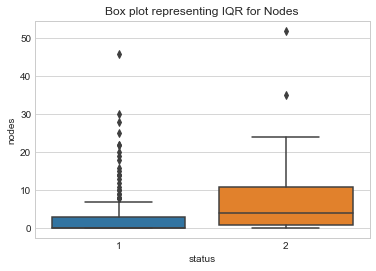

In [321]:
#6.1
sns.boxplot(x='status',y='nodes', data=haberman)
plt.title("Box plot representing IQR for Nodes")
plt.show()

**Observations:**
1. Number of outliers in terms of nodes are higher for status 1.
2. 50 % of people with survial status as 1 have zero nodes.

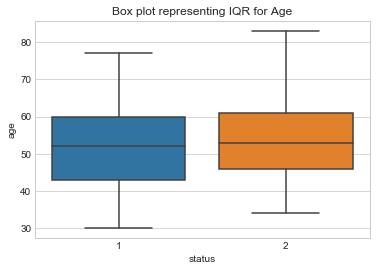

In [320]:
#6.2
sns.boxplot(x='status',y='age', data=haberman)
plt.title("Box plot representing IQR for Age")
plt.show()

**Observations:**
1. People with age more than 60 years has lesser probability of surving more than 5 years.

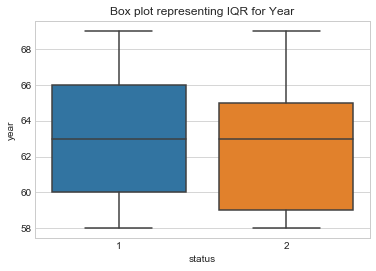

In [319]:
#6.3
sns.boxplot(x='status',y='year', data=haberman)
plt.title("Box plot representing IQR for Year")
plt.show()

**Observations:**
1. People operated after year 65 has more probability of surviving more than 5 years.

# Violin plots

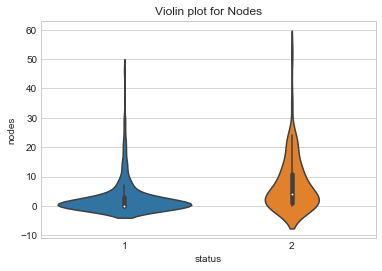

In [322]:
#7.1
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title("Violin plot for Nodes")
plt.show()

**Observation:**
1. The long tail of violin plot suggests the presence of outliers in the data.
2. The presence of long tails signifies the mean will be shifted beacuse of these outliers.

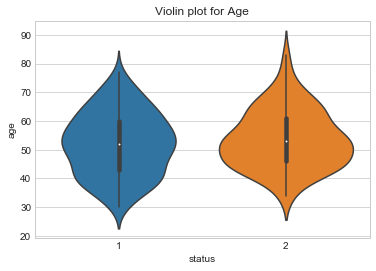

In [323]:
#7.2
sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.title("Violin plot for Age")
plt.show()

**Observations**
1. Young patients i.e. patients below 30 yeras of age has high probability to survive more than 5 years.

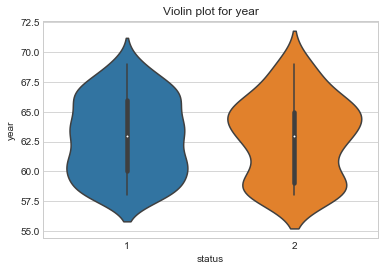

In [324]:
#7.3
sns.violinplot(x="status", y="year", data=haberman, size=8)
plt.title("Violin plot for year")
plt.show()

**Conclusion**
1. Persons treated for cancer are between the age [30,83] 
   thus persons less than 30 years of age are less prone to cancer.(Basic Stats)
2. 75% of patients has less than 5 nodes.(Basic Stats)
3. 75% of patients are above the age of 44 years.(Basic Stats)
4. From the CDF of Status 1 we can conclude that 90% of people with survival status as 1 has less than    20 nodes.(fig:5.3)
5. From the CDF of Status 2 we can conclude that 90% of people with survival status as 2 has less than    30 nodes.(fig:5.3)
6. Probability of a person living 5 years or more, is more for 
   people whose age is less than 49 years.(fig:5.6)
7. After the age of 49 years the probability of a person living more than 5 years 
   and less than 5 years is approximately same.(fig:5.6)
8. 50 % of people with survial status as 1 have zero nodes.(fig:6.1)

